# Eat.Sleep.Data.  - Airbnb Price Predictor Analysis</br>
Team: Alex Conerly, Alex Felice, Betsy Wellington, Hannah Koivisto, Ken Liew, Whitney Losinski
<hr></hr>

## Cleaning and pre-processing the data
### Importing the libraries and data

In [1]:
# Import dependencies
import pandas as pd
import numpy as np

In [2]:
# Download calendar raw data from postgres for stage 1 ETL
listing_data = pd.read_csv("../Resources/listings_full.csv")
pd.set_option('display.max_columns', len(listing_data.columns))
pd.set_option('display.max_rows', 100)
listing_data.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20190117134323,2019-01-17,Nashville Charm,"NOTE: For April and early May, must book at le...",1920 historic bungalow backs up to city park w...,"NOTE: For April and early May, must book at le...",none,Historic East Nashville is home to many new an...,We believe in radical hospitality which is why...,There is a bus stop 3 doors away (#4 Shelby) t...,"Access to the rest of the house, including Liv...",As much or as little as you want- just let us ...,"Respect yourself, respect others, respect the ...",NaN,NaN,https://a0.muscache.com/im/pictures/572c2654-f...,NaN,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,"Nashville, TN, United States",NaN,District 6,NaN,Nashville,TN,37206,Nashville,"Nashville, TN",US,United States,36.173151,-86.735813,t,House,Private room,2,1.0,2,3.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,$40.00,NaN,NaN,NaN,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,6 days ago,t,1,7,10,133,2019-01-17,561,131,2009-04-30,2019-01-13,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Tennessee State""}",f,f,strict_14_with_grace_period,f,f,1,0,1,0,4.74
1,20847,https://www.airbnb.com/rooms/20847,20190117134323,2019-01-17,East Nashville Retro Ranch!,Retro Ranch is nestled in the eclectic East si...,-Retro Ranch is nestled in a quiet part of Sou...,Retro Ranch is nestled in the eclectic East si...,none,"Many local favorites, including live music, th...","If you run, walk or bike, there is a lovely pa...",Uber & Lyft: Get rides from locals. More reli...,AMENITIES: -A healthy breakfast with French p...,Guest interaction is all about you! Whether yo...,Greetings! Check-in: 4pm-7pm* Check-out: 11am ...,NaN,NaN,https://a0.muscache.com/im/pictures/36034958/8...,NaN,79021,https://www.airbnb.com/users/show/79021,Kristina,2010-02-08,"Nashville, Tennessee, United States",I have been an Airbnb host in Nashville for 9 ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/79021/profile...,htt

### Dropping initial columns from listings_full.csv

Looking at the raw data, we can see that there are several columns of data that will need to be dropped prior to any analysis.  Below are the reasons for dropping each column.

1. The following columns are all descriptive variables and we are not using NLP to build our model so they will be deleted.
    - name, summary, space, description, neighborhood_overview, notes, transit, access, interaction, house_rules


2. The following columns are not useful for predicting price as they are not features that are related to the property itself but rather the host or the listing details.
    - scrape_id, listing_url, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_location, host_about, host_thumbnail_url, host_picture_url, host_neighbourhood, host_verifications, calendar_updated, calendar_last_scraped


3. The following columns all deal with location but we are keeping lat/long and neighborhood cleansed for later use in our model and to determine neighborhood so we don't need the other location identifiers.  We are also only using data for Nashville, TN so the city, state and country columns are irrelevant.
    - street, neighbourhood, neighborhood_group_cleansed, city, state, zipcode, market, smart_location, country_code, country, is_location_exact, jurisdiction_names


4. Amenities will be parsed in a separate table so it will be deleted from the current dataset.


5. Extra_people will be dropped because it is an add-on to our target variable.  The price we are using as our target is not representative of the price if the user adds guests to the room.  Therefore, this column will be deleted.

In [3]:
columns_to_drop = listing_data[['listing_url', 'scrape_id', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market','smart_location', 'country_code', 'country', 'is_location_exact', 'amenities', 'calendar_updated', 'calendar_last_scraped', 'extra_people', 'jurisdiction_names']]

In [4]:
listing_data = listing_data.drop(columns=columns_to_drop)
listing_data.shape

(5998, 67)

Checking for NaN rows shows that there are a few columns that need to be dropped.  Since there are 5998 rows in the dataset, anything with over 5000 rows is of no use and will be dropped.  host_response_time and host_response_rate had 1700 NaN values and the team also chose to drop those columns rather all the rows of data.

In [5]:
listing_data.isna().sum()

id                                                 0
last_scraped                                       0
experiences_offered                                0
host_since                                         0
host_response_time                              1700
host_response_rate                              1700
host_acceptance_rate                            5998
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                  

In [6]:
listing_data = listing_data.drop(columns=['host_acceptance_rate', 'host_response_time', 'host_response_rate', 'license', 'square_feet', 'weekly_price', 'monthly_price'])

Host_total_listings_count is redundant to host_lisings_count.  The columns are identical so we will delete host_total_listings_count.  There are also several calculated host listings count columns which break down the listings by room type.  These will be highly correlated with host_listings_count and will negatively impact the model, so those columns will be dropped as well.

In [7]:
host_listing_count_df = listing_data.loc[((listing_data['host_total_listings_count'] == listing_data['host_listings_count']) == False)]
print(host_listing_count_df.shape)

(0, 62)


In [8]:
listing_data = listing_data.drop(columns=['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'])

Plotting the number of occurrences of each value for numerical and boolean categories shows that there are a number of columns with only one variable.  These columns will all be dropped.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_is_superhost'}>,
        <AxesSubplot:title={'center':'host_listings_count'}>,
        <AxesSubplot:title={'center':'host_has_profile_pic'}>,
        <AxesSubplot:title={'center':'host_identity_verified'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'guests_included'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'minimum_minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_minimum_nights'}>,
        <AxesSubplot:title={'center':'minimum_maximum_nights'}>,
        <AxesSubplot:title={

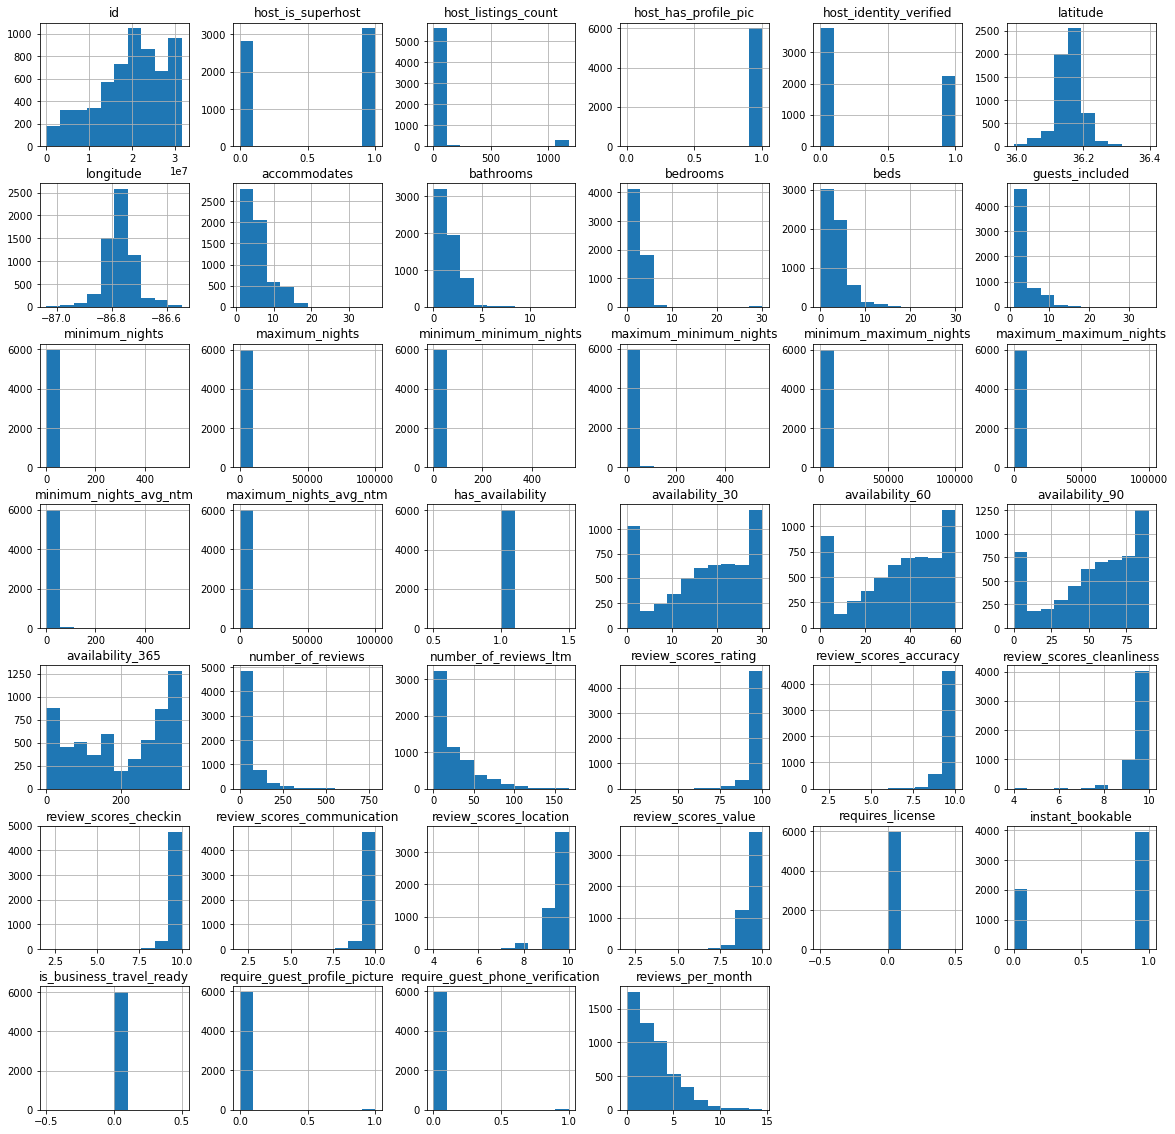

In [9]:
# Replacing columns with f/t with 0/1
listing_data.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
listi(figsize=(20,20))

In [10]:
listing_data = listing_data.drop(columns=['host_has_profile_pic', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'requires_license','is_business_travel_ready','require_guest_profile_picture', 'require_guest_phone_verification'])
listing_data.shape

(5998, 43)

### Cleaning individual columns

In [15]:
listing_data['experiences_offered'].value_counts()

none    5998
Name: experiences_offered, dtype: int64

In [16]:
listing_data['host_response_time'].value_counts()

within an hour        3894
within a few hours     283
within a day           103
a few days or more      18
Name: host_response_time, dtype: int64

In [17]:
listing_data['host_response_rate'].value_counts()

100%    3805
99%      174
90%       70
79%       28
95%       21
98%       21
82%       19
75%       14
97%       13
50%       12
0%        12
96%       11
93%       10
88%        9
87%        8
94%        8
60%        7
92%        7
86%        7
80%        6
70%        6
89%        6
91%        5
67%        5
71%        2
33%        2
83%        2
43%        2
25%        1
57%        1
73%        1
78%        1
38%        1
65%        1
Name: host_response_rate, dtype: int64

In [25]:
listing_data['reviews_per_month'].value_counts()

1.00     113
2.00      82
3.00      36
0.12      28
0.45      25
        ... 
12.15      1
5.73       1
9.34       1
7.70       1
8.49       1
Name: reviews_per_month, Length: 882, dtype: int64

In [21]:
listing_data['extra_people'].value_counts()

$0.00      3373
$10.00      540
$25.00      532
$20.00      360
$15.00      315
$50.00      247
$30.00      121
$5.00        84
$35.00       72
$100.00      68
$40.00       46
$75.00       35
$60.00       22
$12.00       22
$9.00        22
$8.00        18
$55.00       11
$45.00       11
$29.00        9
$18.00        8
$150.00       8
$7.00         7
$65.00        7
$99.00        6
$11.00        6
$200.00       5
$27.00        5
$300.00       4
$19.00        4
$49.00        4
$46.00        3
$39.00        3
$125.00       2
$33.00        2
$22.00        2
$6.00         2
$70.00        1
$13.00        1
$32.00        1
$16.00        1
$23.00        1
$95.00        1
$17.00        1
$85.00        1
$79.00        1
$28.00        1
$24.00        1
$59.00        1
Name: extra_people, dtype: int64

In [ ]:
calendar_data = pd.read_csv("Resources/calendar.csv")